# [Algopack: Super Candles](https://www.moex.com/ru/algopack/about#supercandles)

In [1]:
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))  # Родительская папка
from moexalgo import session, Ticker  # Библиотека данных и аналитики Московской Биржи https://github.com/moexalgo/moexalgo
from Config import Config  # Файл конфигурации

session.authorize(Config.Login, Config.Password)  # Авторизуемся на Московской Бирже
symbol = 'SBER'  # Тикер, который будем исследовать
ticker = Ticker(symbol)  # Тикер на бирже

## Спецификация тикера

SHORTNAME - Короткое название на русском

LOTSIZE - Кол-во акций в лоте

DECIMALS - Кол-во десятичных знаков

MINSTEP - Шаг цены

ISSUESIZE - Кол-во выпущенных акций

ISIN - Уникальный идентификатор

LISTLEVEL - Уровень листинга (?)

In [2]:
info = ticker.info()  # Спецификация тикера
print(type(info))  # Данные представлены в виде pandas DataFrame
print(info.loc['LOTSIZE'].value)  # Кол-во акций в лоте
info

<class 'pandas.core.frame.DataFrame'>
10


,value
SHORTNAME,Сбербанк
LOTSIZE,10
DECIMALS,2
MINSTEP,0.01
ISSUESIZE,21586948000
ISIN,RU0009029540
LISTLEVEL,1


## Получение истории
Возможные временнЫе интервалы в минутах (int) 1, 10, 60. "D" - дни, "W" - недели, "M" - месяцы, "Q" - кварталы

In [3]:
from datetime import datetime
import pandas as pd

start_date = datetime(2020, 1, 1).date()  # Дата начала интервала. Это минимально возможная дата для запросов
end_date = datetime.now().date()  # Дата окончания интервала
bars: pd.DataFrame = ticker.candles(date=start_date, till_date=end_date, period='D', limit=1000)  # История. Максимум, 50 000 баров
bars

,open,close,high,low,value,volume,begin,end
0,255.99,255.00,258.19,253.70,9.165475e+09,35851840.0,2020-01-03,2020-01-03 23:59:59
1,254.75,253.90,254.84,251.40,5.646010e+09,22348300.0,2020-01-06,2020-01-06 23:59:59
2,253.57,259.15,259.15,253.03,1.048588e+10,40817240.0,2020-01-08,2020-01-08 23:59:59
3,259.40,257.99,261.76,257.01,9.936032e+09,38329020.0,2020-01-09,2020-01-09 23:59:59
4,257.86,258.19,259.25,256.88,4.864405e+09,18851390.0,2020-01-10,2020-01-10 23:59:59
...,...,...,...,...,...,...,...,...
958,280.40,283.97,284.80,280.32,1.298757e+10,45887770.0,2023-11-13,2023-11-13 23:59:59
959,283.70,280.87,283.88,280.54,1.142087e+10,40484810.0,2023-11-14,2023-11-14 23:59:59
960,280.87,282.89,283.93,278.51,1.175952e+10,41837690.0,2023-11-15,2023-11-15 23:59:59
961,282.40,279.70,283.69,279.56,6.960894e+09,24696600.0,2023-11-16,2023-11-16 23:59:59


In [4]:
import os.path

datapath = os.path.join('..', '..', 'DataMOEX', '')  # Путь сохранения файлов для Windows/Linux
file_name = f'{datapath}{symbol}_D1.txt'
bars = pd.read_csv(file_name, sep='\t', parse_dates=['datetime'], date_format='%d.%m.%Y %H:%M', index_col='datetime')  # Считываем файл в DataFrame

print(bars.dtypes)
print()
bars

open      float64
high      float64
low       float64
close     float64
volume    float64
value     float64
dtype: object



,open,high,low,close,volume,value
datetime,,,,,,
2020-01-03,255.99,258.19,253.70,255.00,35851840.0,9.165475e+09
2020-01-06,254.75,254.84,251.40,253.90,22348300.0,5.646010e+09
2020-01-08,253.57,259.15,253.03,259.15,40817240.0,1.048588e+10
2020-01-09,259.40,261.76,257.01,257.99,38329020.0,9.936032e+09
2020-01-10,257.86,259.25,256.88,258.19,18851390.0,4.864405e+09
...,...,...,...,...,...,...
2023-11-13,280.40,284.80,280.32,283.97,45887770.0,1.298757e+10
2023-11-14,283.70,283.88,280.54,280.87,40484810.0,1.142087e+10
2023-11-15,280.87,283.93,278.51,282.89,41837690.0,1.175952e+10


## [Сделки](https://www.moex.com/ru/algopack/calculation_method#trades-metrics) (Trades)
Считаются все сделки, которые были в 5-и минутном интервале.

In [5]:
tradestats = ticker.tradestats(date=start_date, till_date=end_date, limit=1000)
tradestats

,ticker,tradedate,tradetime,pr_open,pr_high,pr_low,pr_close,pr_std,vol,val,...,trades_b,trades_s,val_b,val_s,vol_b,vol_s,disb,pr_vwap_b,pr_vwap_s,systime
0,SBER,2020-01-03,10:05:00,255.97,256.97,255.85,256.77,0.0001,116141,297831085.0,...,1091,844,171039244.0,126791841.0,66691,49450,0.15,256.47,256.40,2023-11-14 20:47:14
1,SBER,2020-01-03,10:10:00,256.77,256.90,256.30,256.70,0.0001,91089,233774043.0,...,607,463,137298083.0,96475959.0,53495,37594,0.17,256.66,256.63,2023-11-14 20:47:15
2,SBER,2020-01-03,10:15:00,256.68,256.75,256.03,256.12,0.0001,44029,112878288.0,...,270,394,39244498.0,73633790.0,15308,28721,-0.30,256.37,256.38,2023-11-14 20:47:16
3,SBER,2020-01-03,10:20:00,256.19,256.42,255.83,255.89,0.0001,47233,120941565.0,...,348,473,52097439.0,68844126.0,20341,26892,-0.14,256.12,256.00,2023-11-14 20:47:32
4,SBER,2020-01-03,10:25:00,255.89,256.31,255.88,256.13,0.0001,21910,56115025.0,...,253,248,35361727.0,20753298.0,13806,8104,0.26,256.13,256.09,2023-11-14 20:47:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SBER,2020-01-17,15:00:00,262.11,262.36,261.93,262.35,0.0001,44414,116445878.0,...,326,872,67988743.0,48457135.0,25931,18483,0.17,262.19,262.17,2023-11-14 20:31:43
996,SBER,2020-01-17,15:05:00,262.35,262.82,262.31,262.60,0.0001,135671,356194170.0,...,1686,687,270236057.0,85958113.0,102925,32746,0.52,262.56,262.50,2023-11-14 20:31:09
997,SBER,2020-01-17,15:10:00,262.60,262.60,262.15,262.26,0.0001,30540,80124835.0,...,144,271,26805991.0,53318844.0,10215,20325,-0.33,262.42,262.33,2023-11-14 20:31:44
998,SBER,2020-01-17,15:15:00,262.25,262.40,262.17,262.34,0.0001,19623,51469373.0,...,147,158,16893297.0,34576076.0,6440,13183,-0.34,262.32,262.28,2023-11-14 20:31:44


In [6]:
file_name = f'{datapath}{symbol}_tradestats.txt'
tradestats = pd.read_csv(file_name, sep='\t', parse_dates=['datetime'], date_format='%d.%m.%Y %H:%M', index_col='datetime')  # Считываем файл в DataFrame

print(tradestats.dtypes)
print()
tradestats

pr_open      float64
pr_high      float64
pr_low       float64
pr_close     float64
pr_change    float64
trades         int64
vol            int64
val          float64
pr_std       float64
disb         float64
pr_vwap      float64
trades_b       int64
vol_b          int64
val_b        float64
pr_vwap_b    float64
trades_s       int64
vol_s          int64
val_s        float64
pr_vwap_s    float64
dtype: object



,pr_open,pr_high,pr_low,pr_close,pr_change,trades,vol,val,pr_std,disb,pr_vwap,trades_b,vol_b,val_b,pr_vwap_b,trades_s,vol_s,val_s,pr_vwap_s
datetime,,,,,,,,,,,,,,,,,,,
2020-06-22 10:00:00,206.70,206.70,205.15,205.88,-0.3967,2386,278957,574238800.0,0.0003,-0.15,205.85,1071,118992,244970279.0,205.87,1315,159965,329268520.0,205.84
2020-06-22 10:05:00,205.89,205.89,204.35,204.67,-0.5925,2286,177912,364569483.0,0.0001,-0.27,204.92,985,65302,133767090.0,204.84,1301,112610,230802393.0,204.96
2020-06-22 10:10:00,204.63,205.00,204.28,204.63,0.0000,1474,175304,358847778.0,0.0001,0.24,204.70,731,109082,223355199.0,204.76,743,66222,135492579.0,204.60
2020-06-22 10:15:00,204.57,204.79,204.36,204.72,0.0733,1026,111931,228934795.0,0.0001,-0.29,204.53,453,39819,81459832.0,204.58,573,72112,147474963.0,204.51
2020-06-22 10:20:00,204.70,205.25,204.59,204.90,0.0977,971,109476,224321445.0,0.0001,0.51,204.90,625,82660,169397989.0,204.93,346,26816,54923455.0,204.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 18:15:00,281.64,281.66,281.53,281.53,-0.0391,353,7698,21677092.0,0.0000,-0.65,281.59,135,1341,3776578.0,281.62,218,6357,17900514.0,281.59
2023-11-14 18:20:00,281.54,281.54,281.30,281.32,-0.0781,517,27157,76421564.0,0.0000,-0.65,281.41,165,4811,13535732.0,281.35,352,22346,62885832.0,281.42
2023-11-14 18:25:00,281.33,281.99,281.31,281.65,0.1137,498,26786,75450163.0,0.0001,0.45,281.68,350,19362,54534734.0,281.66,148,7424,20915428.0,281.73


### Цены
- pr_open - Цена открытия — цена первой сделки за период (Open)
- pr_high - Максимальная цена за период — это самая высокая цена, по которой была совершена сделка за  период (High)
- pr_low - Минимальная цена за период — это самая низкая цена, по которой была совершена сделка за  период (Low)
- pr_close - Последняя цена — это цена последней совершенной сделки за период (Close)
- pr_change = 100 * (pr_close - pr_open) / pr_open - Изменение цены за период — это разница между ценой закрытия и ценой открытия в процентах
### Объем (лоты)
Сделки на покупку и продажу определются заявками, которые бьют по стакану и выбивают те, что находятся в стакане. Например, рыночная заявка на покупку выбивает заявку из стакана на продажу. Эта сделка на покупку.
- vol_b - Объем покупок в лотах бумаг — это количество бумаг, которые были куплены за период
- vol_s - Объем продаж в лотах бумаг — это количество бумаг, которые были проданы за период
- vol = vol_b + vol_s - Объем в лотах бумаг — это количество лотов, которые были куплены или проданы за период (Volume)
- disb = (vol_b - vol_s) / (vol_b + vol_s) - Соотношение объема продавец/покупатель — это отношение объема продаж к объему покупок. 1 (100% покупки), 0 (покупки = продажи), -1 (100% продажи)
### Объем (рубли)
- val_b - Объем покупок в рублях — это общая стоимость всех сделок на покупку, совершенных за период
- val_s - Объем продаж в рублях — это общая стоимость всех сделок на продажу, совершенных за период
- val = val_b + val_s - Объем в рублях — это общая стоимость всех сделок, совершенных за период
### Средневзвешенная цена
- pr_vwap_b = val_b / vol_b / LOTSIZE - Средневзвешенная цена покупки — это средняя цена покупки, весом которых является объем соответствующих сделок на покупку
- pr_vwap_s = val_s / vol_s / LOTSIZE - Средневзвешенная цена продажи — это средняя цена продажи, весом которых является объем соответствующих сделок на продажу
- pr_vwap = val / vol / LOTSIZE - Средневзвешенная цена — это средняя цена сделок, весом которых является объем сделок
### Количество сделок
- trades_b - Количество сделок, совершенных на покупку за период
- trades_s - Количество сделок, совершенных на продажу за период
- trades = trades_b + trades_s - Количество сделок — это общее число сделок, совершенных за период
### Стандартное отклонение
- pr_std - Стандартное отклонение цены в долях — это мера волатильности, показывающая, насколько сильно цена акции изменяется за период в процентах

## [Заявки](https://www.moex.com/ru/algopack/calculation_method#order-metrics) (Orders)
Считаются все заявки, которые были поставлены и сняты в 5-и минутном интервале.

In [7]:
orderstats = ticker.orderstats(date=start_date, till_date=end_date, limit=1000)
orderstats

,ticker,tradedate,tradetime,put_orders_b,put_orders_s,put_val_b,put_val_s,put_vol_b,put_vol_s,put_vwap_b,...,cancel_val_b,cancel_val_s,cancel_vol_b,cancel_vol_s,cancel_vwap_b,cancel_vwap_s,cancel_vol,cancel_val,cancel_orders,systime
0,SBER,2020-01-03,10:05:00,6397,5246,3.369360e+09,2.404386e+09,1314895,906317,256.25,...,3.040555e+09,2.050090e+09,1187314,798022,256.09,256.90,1985336,5.090645e+09,8852,2023-11-14 22:24:55
1,SBER,2020-01-03,10:10:00,2974,2744,1.441433e+09,1.135023e+09,561007,420907,256.94,...,1.151134e+09,9.275294e+08,449073,336425,256.34,275.70,785498,2.078664e+09,4340,2023-11-14 22:24:57
2,SBER,2020-01-03,10:15:00,2117,2662,6.276429e+08,1.705761e+09,244967,647811,256.22,...,5.401153e+08,1.562821e+09,210814,597982,256.20,261.35,808796,2.102937e+09,3925,2023-11-14 22:24:58
3,SBER,2020-01-03,10:20:00,2203,3120,7.457060e+08,1.996584e+09,272449,767843,273.70,...,5.812600e+08,1.894355e+09,227307,732444,255.72,258.63,959751,2.475615e+09,4374,2023-11-14 22:24:59
4,SBER,2020-01-03,10:25:00,1770,1514,5.689109e+08,6.321157e+08,221155,246715,257.25,...,4.846964e+08,5.863713e+08,188669,228747,256.90,256.34,417416,1.071068e+09,2614,2023-11-14 22:25:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SBER,2020-01-17,15:00:00,2567,3454,1.045981e+09,1.134590e+09,394690,432883,265.01,...,8.878147e+08,1.041126e+09,337104,396871,263.37,262.33,733975,1.928941e+09,4689,2023-11-14 22:05:22
996,SBER,2020-01-17,15:05:00,4756,4078,1.711415e+09,1.305367e+09,638129,479806,268.19,...,1.422042e+09,1.010813e+09,535884,377152,265.36,268.01,913036,2.432855e+09,6516,2023-11-14 22:05:23
997,SBER,2020-01-17,15:10:00,2135,2404,8.880450e+08,9.061450e+08,327865,345250,270.86,...,8.120345e+08,7.375616e+08,296126,280512,274.22,262.93,576638,1.549596e+09,3892,2023-11-14 22:05:24
998,SBER,2020-01-17,15:15:00,1608,1713,5.454773e+08,7.125668e+08,202373,271719,269.54,...,4.829725e+08,6.521857e+08,178540,248074,270.51,262.90,426614,1.135158e+09,2905,2023-11-14 22:05:25


In [8]:
file_name = f'{datapath}{symbol}_orderstats.txt'
orderstats = pd.read_csv(file_name, sep='\t', parse_dates=['datetime'], date_format='%d.%m.%Y %H:%M', index_col='datetime')  # Считываем файл в DataFrame

print(orderstats.dtypes)
print()
orderstats

put_orders           int64
put_orders_b         int64
put_orders_s         int64
put_vol              int64
put_vol_b            int64
put_vol_s            int64
put_val            float64
put_val_b          float64
put_val_s          float64
cancel_orders        int64
cancel_orders_b      int64
cancel_orders_s      int64
cancel_vol           int64
cancel_vol_b         int64
cancel_vol_s         int64
cancel_val         float64
cancel_val_b       float64
cancel_val_s       float64
put_vwap_b         float64
put_vwap_s         float64
cancel_vwap_b      float64
cancel_vwap_s      float64
dtype: object



,put_orders,put_orders_b,put_orders_s,put_vol,put_vol_b,put_vol_s,put_val,put_val_b,put_val_s,cancel_orders,...,cancel_vol,cancel_vol_b,cancel_vol_s,cancel_val,cancel_val_b,cancel_val_s,put_vwap_b,put_vwap_s,cancel_vwap_b,cancel_vwap_s
datetime,,,,,,,,,,,,,,,,,,,,,
2020-06-22 10:00:00,18047,8368,9679,5915439,2788225,3127214,1.242597e+10,5.769109e+09,6.656866e+09,14623,...,5252609,2451782,2800827,1.099903e+10,5.038597e+09,5.960428e+09,206.91,212.87,205.51,212.81
2020-06-22 10:05:00,22561,10459,12102,6425596,1717258,4708338,1.337481e+10,3.534101e+09,9.840713e+09,19758,...,6106688,1563670,4543018,1.256499e+10,3.200779e+09,9.364213e+09,205.80,209.01,204.70,206.12
2020-06-22 10:10:00,19452,10999,8453,6942324,4213863,2728461,1.429996e+10,8.632102e+09,5.667862e+09,17268,...,6599351,4008379,2590972,1.356550e+10,8.198651e+09,5.366846e+09,204.85,207.73,204.54,207.14
2020-06-22 10:15:00,11459,5821,5638,2303702,890474,1413228,4.776406e+09,1.876684e+09,2.899723e+09,10060,...,2052181,725457,1326724,4.225993e+09,1.509345e+09,2.716648e+09,210.75,205.18,208.05,204.76
2020-06-22 10:20:00,12292,7495,4797,2948743,2216828,731915,6.124954e+09,4.558626e+09,1.566328e+09,10961,...,2717814,2081407,636407,5.631195e+09,4.279972e+09,1.351223e+09,205.64,214.00,205.63,212.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14 18:15:00,5894,2560,3334,938169,402694,535475,2.641475e+09,1.133473e+09,1.508002e+09,5498,...,919218,395057,524161,2.596526e+09,1.111719e+09,1.484808e+09,281.47,281.62,281.41,283.27
2023-11-14 18:20:00,20390,9147,11243,3662843,1599552,2063291,1.030599e+10,4.499043e+09,5.806944e+09,19941,...,3618131,1577220,2040911,1.018078e+10,4.435509e+09,5.745269e+09,281.27,281.44,281.22,281.51
2023-11-14 18:25:00,9832,4649,5183,1791722,870574,921148,5.052852e+09,2.457411e+09,2.595441e+09,9302,...,1747743,856577,891166,4.925528e+09,2.414343e+09,2.511185e+09,282.27,281.76,281.86,281.79


### Количество поставленных заявок
- put_orders_b - Количество заявок, поставленных на покупку
- put_orders_s - Количество заявок, поставленных на продажу
- put_orders = put_orders_b + put_orders_s - Количество поставленных заявок
### Количество снятых заявок
- cancel_orders_b - Количество снятых заявок на покупку
- cancel_orders_s - Количество снятых заявок на продажу
- cancel_orders = cancel_orders_b + cancel_orders_s - Количество снятых заявок
### Объем поставленных заявок (лоты)
- put_vol_b - Объем заявок в лотах, поставленных в стакан на покупку
- put_vol_s - Объем заявок в лотах, поставленных в стакан на продажу
- put_vol = put_vol_b + put_vol_s - Объем завок в лотах, поставленных в стакан
### Объем снятых заявок (лоты)
- cancel_vol_b - Объем снятых заявок на покупку в лотах
- cancel_vol_s - Объем снятых заявок на продажу в лотах
- cancel_vol = cancel_vol_b + cancel_vol_s - Объем снятых заявок в лотах
### Объем поставленных заявок (рубли)
- put_val_b - Объем заявок в рублях, поставленных в стакан на покупку
- put_val_s - Объем заявок в рублях, поставленных в стакан на продажу
- put_val = put_val_b + put_val_s - Объем завок в рублях, поставленных в стакан
### Объем снятых заявок (рубли)
cancel_val_b - Объем снятых заявок на покупку в рублях
cancel_val_s - Объем снятых заявок на продажу в рублях
cancel_val = cancel_val_b + cancel_val_s - Объем снятых заявок в рублях
### Средневзвешенная цена поставленных заявок
- put_vwap_b = put_val_b / put_vol_b - Средневзвешенная цена заявок на покупку
- put_vwap_s = put_val_s / put_vol_s - Средневзвешенная цена заявок на продажу
### Средневзвешенная цена снятых заявок
- cancel_vwap_b = cancel_val_b / cancel_vol_b - Средневзвешенная цена снятых заявок на покупку
- cancel_vwap_s = cancel_val_s / cancel_vol_s - Средневзвешенная цена снятых заявок на продажу

**Внимание!** Не все метрики "бьются" по времени. Где-то есть пропуски. Обязательно проверяйте, что метрики существуют.

In [9]:
tradestats.index.difference(orderstats.index).to_numpy()

array(['2023-09-05T10:00:00.000000000', '2023-09-05T10:05:00.000000000',
       '2023-09-05T10:10:00.000000000', '2023-09-05T10:15:00.000000000',
       '2023-09-05T10:20:00.000000000', '2023-09-05T10:25:00.000000000',
       '2023-09-05T10:30:00.000000000', '2023-09-05T10:35:00.000000000',
       '2023-09-05T10:40:00.000000000', '2023-09-05T10:45:00.000000000',
       '2023-09-05T10:50:00.000000000', '2023-09-05T10:55:00.000000000',
       '2023-09-05T11:00:00.000000000', '2023-09-05T11:05:00.000000000',
       '2023-09-05T11:10:00.000000000', '2023-09-05T11:15:00.000000000',
       '2023-09-05T11:20:00.000000000', '2023-09-05T11:25:00.000000000',
       '2023-09-05T11:30:00.000000000', '2023-09-05T11:35:00.000000000',
       '2023-09-05T11:40:00.000000000', '2023-09-05T11:45:00.000000000',
       '2023-09-05T11:50:00.000000000', '2023-09-05T11:55:00.000000000',
       '2023-09-05T12:00:00.000000000', '2023-09-05T12:05:00.000000000',
       '2023-09-05T12:10:00.000000000', '2023-09-05

## [Стакан](https://www.moex.com/ru/algopack/calculation_method#dom-metrics) (OrderBook)
Каждые 10 секунд создается снимок стакана. По этому снимку считаются все метрики. За 5 минут получается 30 снимков. Результаты метрик усредняются.

In [10]:
obstats = ticker.obstats(date=start_date, till_date=end_date, limit=1000)
obstats

,ticker,tradedate,tradetime,spread_bbo,spread_lv10,spread_1mio,levels_b,levels_s,vol_b,vol_s,...,val_s,imbalance_vol_bbo,imbalance_val_bbo,imbalance_vol,imbalance_val,vwap_b,vwap_s,vwap_b_1mio,vwap_s_1mio,systime
0,SBER,2021-02-11,10:05:00,3.6,15.1,5.7,753,803,193607,368461,...,999525966,-0.13,-0.13,-0.32,-0.33,260.07,271.29,265.89,266.04,2023-11-18 12:30:13
1,SBER,2021-02-11,10:10:00,3.0,12.4,5.0,819,853,256917,421228,...,1142405631,-0.03,-0.03,-0.24,-0.26,260.83,271.21,266.33,266.46,2023-11-18 12:30:13
2,SBER,2021-02-11,10:15:00,2.7,10.9,25.5,830,893,268182,456704,...,1238256714,0.01,0.01,-0.26,-0.28,260.86,271.13,265.64,266.31,2023-11-18 12:30:13
3,SBER,2021-02-11,10:20:00,2.0,10.3,3.6,816,947,310781,531319,...,1439635852,0.24,0.24,-0.26,-0.28,261.26,270.96,265.70,265.79,2023-11-18 12:30:14
4,SBER,2021-02-11,10:25:00,2.3,9.8,3.4,792,997,273512,580827,...,1572233805,0.11,0.11,-0.36,-0.38,260.16,270.69,265.05,265.14,2023-11-18 12:30:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SBER,2021-02-24,15:00:00,2.4,11.1,3.7,1074,845,560044,609485,...,1686190173,0.03,0.03,-0.04,-0.06,266.29,276.66,271.48,271.58,2023-11-18 07:05:29
996,SBER,2021-02-24,15:05:00,2.9,11.6,4.3,1065,854,560120,610936,...,1690100830,0.18,0.18,-0.04,-0.06,266.28,276.64,271.37,271.49,2023-11-18 07:05:29
997,SBER,2021-02-24,15:10:00,3.2,11.4,4.1,1078,841,561980,601493,...,1664430099,0.14,0.14,-0.03,-0.05,266.31,276.72,271.51,271.62,2023-11-18 07:05:30
998,SBER,2021-02-24,15:15:00,2.3,10.2,3.0,1107,814,569730,589064,...,1630681693,0.13,0.13,-0.02,-0.04,266.38,276.83,271.85,271.93,2023-11-18 07:05:30


In [11]:
file_name = f'{datapath}{symbol}_obstats.txt'
obstats = pd.read_csv(file_name, sep='\t', parse_dates=['datetime'], date_format='%d.%m.%Y %H:%M')  # Считываем файл в DataFrame

print(obstats.dtypes)
print()
obstats

datetime             datetime64[ns]
spread_bbo                  float64
spread_lv10                 float64
spread_1mio                 float64
levels_b                      int64
levels_s                      int64
vol_b                         int64
vol_s                         int64
val_b                         int64
val_s                         int64
imbalance_vol_bbo           float64
imbalance_val_bbo           float64
imbalance_vol               float64
imbalance_val               float64
vwap_b                      float64
vwap_s                      float64
vwap_b_1mio                 float64
vwap_s_1mio                 float64
dtype: object



,datetime,spread_bbo,spread_lv10,spread_1mio,levels_b,levels_s,vol_b,vol_s,val_b,val_s,imbalance_vol_bbo,imbalance_val_bbo,imbalance_vol,imbalance_val,vwap_b,vwap_s,vwap_b_1mio,vwap_s_1mio
0,2021-12-23 10:00:00,2.5,11.6,4.1,183,235,72768,119081,211331016,360713791,-0.01,-0.01,-0.24,-0.26,290.19,302.86,296.20,296.32
1,2021-12-23 10:05:00,2.1,11.5,34.3,295,253,109946,140349,320724071,425625777,-0.10,-0.10,-0.12,-0.14,291.70,303.27,296.64,297.64
2,2021-12-23 10:10:00,2.5,11.1,4.0,321,335,119608,174693,349486787,528573093,-0.28,-0.28,-0.19,-0.20,292.17,302.58,297.27,297.39
3,2021-12-23 10:15:00,2.3,10.9,5.1,327,393,130441,202094,381149769,610712585,-0.48,-0.48,-0.22,-0.23,292.20,302.20,296.94,297.10
4,2021-12-23 10:20:00,2.8,11.4,3.8,303,440,128030,219330,373300841,661859944,-0.08,-0.08,-0.26,-0.28,291.55,301.77,296.32,296.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46483,2023-11-14 18:15:00,0.6,7.0,1.0,1250,957,562120,466434,1550234651,1341215282,-0.01,-0.01,0.09,0.07,275.78,287.55,281.59,281.62
46484,2023-11-14 18:20:00,0.5,6.9,0.6,1221,968,553305,468253,1525336652,1346301077,0.03,0.03,0.08,0.06,275.68,287.52,281.36,281.37
46485,2023-11-14 18:25:00,0.8,7.7,1.2,1246,951,553413,465364,1525650312,1338217562,0.40,0.40,0.09,0.07,275.68,287.56,281.62,281.65
46486,2023-11-14 18:30:00,0.7,7.9,1.0,1269,948,562324,486979,1550510032,1399191593,-0.09,-0.09,0.07,0.05,275.73,287.32,281.68,281.70


### Спред
- spread_bbo - Разница между лучшей ценой продажи (best ask) и лучшей ценой покупки (best bid) в базисных пунктах. В таком формате спред можно сравнивать по бумагам вне зависимости от цен. Метрика важна для понимания текущего состояния рынка, так как показывает, насколько близки покупатели и продавцы по своим ожиданиям относительно цены. Используется для измерения ликвидности рынка — чем меньше спред, тем выше ликвидность.
- spread_lvl10 - Разница между ценами покупки и продажи на десятом уровне. Показывает, насколько сильно цены различаются на глубине стакана заявок в базисных пунктах. В таком формате спред можно сравнивать по бумагам вне зависимости от цен
- spread_1mio - Спред на сумму в 1 млн. руб. в базисных пунктах. Эта метрика показывает, какова будет разница в ценах покупки и продажи при сделке на указанную сумму. Это позволяет оценить ликвидность рынка при крупных сделках.
### Уровни
- levels_b - Количество уровней цен в стакане для покупки. Большое количество уровней обычно означает большую ликвидность и глубину рынка.
- levels_s - Количество уровней цен в стакане для продажи. Большое количество уровней обычно означает большую ликвидность и глубину рынка.
### Объем (лоты)
- vol_b - Совокупный объем заявок в стакане на всех уровнях для покупки. Метрика показывает общее количество активов, которые трейдеры хотят купить. Это дает представление о потенциальной активности на рынке.
- vol_s - Совокупный объем заявок в стакане на всех уровнях для продажи. Метрика показывает общее количество активов, которые трейдеры хотят продать. Это дает представление о потенциальной активности на рынке.
### Объем (рубли)
- val_b - Совокупный объем заявок в стакане на всех уровнях для покупки в рублях. Эта метрика показывает общую стоимость всех активов, которые трейдеры хотят купить.
- val_s - Совокупный объем заявок в стакане на всех уровнях для продажи в рублях. Эта метрика показывает общую стоимость всех активов, которые трейдеры хотят продать.
### Дисбаланс (лоты)
- imbalance_vol = (vol_b - vol_s) / (vol_b + vol_s) - Разница между совокупными объемами покупки и продажи на всех уровнях стакана. Позволяет оценить разницу между объемами покупки и продажи на всех уровнях стакана. Может указывать на общий дисбаланс на рынке. Отрицательное значение свидетельствует о преобладании продавцов.
- imbalance_vol_bbo - Дисбаланс объема по лучшим ценам. Метрика показывает разницу между объемом активов, которые трейдеры хотят купить и продать по лучшим ценам. Указывает на отклонение в предложении и спросе. Отрицательное значение свидетельствует о преобладании продавцов.
### Дисбаланс (рубли)
- imbalance_val = (val_b - val_s) / (val_b + val_s) - Разница между совокупными объемами покупки и продажи на всех уровнях стакана, выраженная в рублях. Позволяет оценить разницу между объемами покупки и продажи в денежном эквиваленте на всех уровнях стакана. Отрицательное значение свидетельствует о преобладании продавцов.
- imbalance_val_bbo - Дисбаланс объема в рублях по лучшим ценам. Метрика показывает разницу в стоимости активов, которые трейдеры хотят купить и продать по лучшим ценам. Отрицательное значение свидетельствует о преобладании продавцов.
### Средневзвешенная цена
- vwap_b = val_b / vol_b - Средневзвешенная цена покупки на всем стакане — сумма произведений цен на соответствующие объемы, делённая на общий объём. Показывает, какова средняя цена активов, которые трейдеры хотят купить, с учетом объема каждого заявленного уровня цены. Обычно используется для измерения «средней» цены, по которой активы куплены.
- vwap_s = val_s / vol_s - Средневзвешенная цена продажи на всем стакане — сумма произведений цен на соответствующие объемы, делённая на общий объём. Показывает, какова средняя цена активов, которые трейдеры хотят продать, с учетом объема каждого заявленного уровня цены. Обычно используется для измерения «средней» цены, по которой активы проданы.
- vwap_b_1mio - Средневзвешенная цена покупки актива на сумму в 1 млн руб. Показывает, какова будет средняя цена активов при покупке на указанную сумму.
- vwap_s_1mio - Средневзвешенная цена продажи актива на сумму в 1 млн руб. Показывает, какова будет средняя цена активов при продаже на указанную сумму.

## Полученные метрики
На рынке нельзя точно предсказать (1) кто, (2) когда, (3) что, (4) каким лотом, (5) купит или продаст. Поэтому, каждую покупку или продажу (сделку) можно считать случайной. Набор случайных сделок создает белый шум, имеющий нормальное распределение.

Кроме сделок случайным будет изменение цены, к которым привели сделки. Сама цена не будет случайной, т.к. ее значение будет прошлая цена + случайное изменение цены. Цена = это белый шум (изменение цены) + обратная связь (прошлая цена) = розовый шум.

Каждая метрика выдается за 5-и минутный интервал. Это означает, что мгновенные значения метрики будут агрегироваться (складываться) или нормализовываться (усредняться). Мы будем получать интегрированные значения. Интегрирование - это применение фильтра нижних частот (ФНЧ). Он режет верхние частоты (белый шум) и пропускает нижние частоты (рыночные циклы и тренды).

Чем больше период усреднения, тем больше удаляется белого шума. Тем меньше будет корреляция с белым шумом. При максимальном значении метрика выродится в горизонтальную линию с нулевой корреляцией с белым шумом.

## Строим идеальное нормальное распределение

<Axes: >

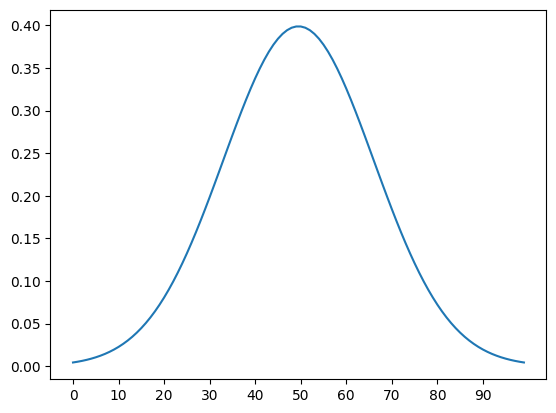

In [12]:
from scipy.stats import norm
import numpy as np

bins_count = 100  # Кол-во корзин, на которые раскладываем значения

l = np.linspace(-3, 3, bins_count)  # Диапазон нормального распределения +-3 сигмы. В нем 0.997300203937 значений
p = norm.pdf(l)  # Нормальное распределение
norm_pdf = pd.Series(p)  # Переводим в pandas Series
norm_pdf.plot(xticks=np.arange(0, bins_count, 10))

## Корреляция нормального распределения с распределением случайной величины

Кол-во значений 87559
Значения -4.7509512621724515 до 4.108768402008202
Среднее 0.002934614139988238
0.8498485316575487


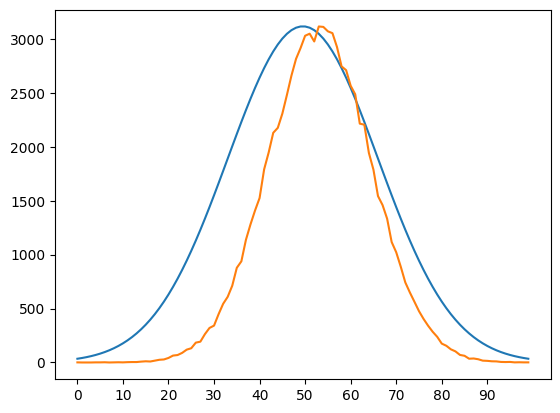

In [13]:
# random_pdf = pd.cut(np.random.normal(size=len(tradestats)), bins_count).value_counts().reset_index()['count']  # Распишем
s = len(tradestats)  # Кол-во случайных величин берем равным кол-ву бар истории
r = np.random.normal(size=s)  # Генерируем случайные величины
c = pd.cut(r, bins_count)  # К какому интервалу принадлежит каждое значение
vc = c.value_counts()  # Кол-во значений в каждом интервале
ri = vc.reset_index()  # Вместо значений интервалов подставляем номера корзин. Значение интервала -> колонка index
random_pdf = ri['count']  # В колонке count будет распределение нормальной величины
print('Кол-во значений', len(r))
print('Значения', r.min(), 'до', r.max())
print('Среднее', r.mean())

koeff = random_pdf.max() / norm_pdf.max()  # Коэфф. нормирования для нормального распределения. Чтобы графики были в одном масштабе
(norm_pdf * koeff).plot(xticks=np.arange(0, bins_count, 10))
random_pdf.plot(xticks=np.arange(0, bins_count, 10))
print(random_pdf.corr(norm_pdf, 'kendall'))

## Корреляция нормального распределения с движением цены
В формуле расчета движению за сессию лежит разница между ценами. Это моментум или фильтр верхних частот (ФВЧ). Применение такого фильтра выбеляет рыночный спектр. В отличие от случайной величины, у движений за сессию нет симметричного разброса в положительную и отрицательную сторону относительно нуля.

Распределение похоже на нормальное. Из-за смещения центра распределения, корреляция с нормальным распределением будет низким.

Кол-во значений 87559
Движения от -20.5342 до 16.6038 %
Среднее -0.00024677645930172766 %
True
0.46180533744325125


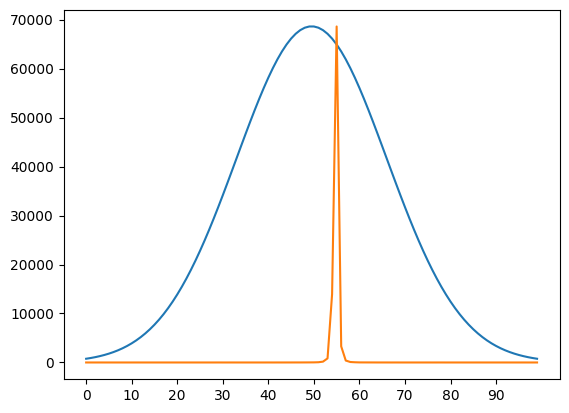

In [14]:
pr_change = tradestats['pr_change']  # Движения за сессию в процентах с округлением 4 знака после запятой
print('Кол-во значений', len(pr_change))
print('Движения от', pr_change.min(), 'до', pr_change.max(), '%')
print('Среднее', pr_change.mean(), '%')
pr_change2 = (tradestats['pr_close'] - tradestats['pr_open']) / tradestats['pr_open'] * 100  # Расчет движения за сессию в процентах без округления
print(((pr_change - pr_change2).abs() < 0.0001).all())  # Разница между ними в 5-ом знаке. Считаем, что посчитано на серверах ММВБ было верно
session_pdf = pd.cut(pr_change, bins_count).value_counts(sort=False).reset_index()['count']  # Распределения движений
koeff = session_pdf.max() / norm_pdf.max()  # Коэфф. нормирования для нормального распределения
(norm_pdf * koeff).plot(xticks=np.arange(0, bins_count, 10))
session_pdf.plot(xticks=np.arange(0, bins_count, 10))
print(session_pdf.corr(norm_pdf, 'kendall'))